## An analysis of video game sales (1980 - early 2020)

In [3]:
# import modules
import pandas as pd
import numpy as np

In [4]:
data_path = "vgsales.csv"
df = pd.read_csv(data_path) # read csv data

### Data overview

In [5]:
df.head() # view 5 first columns

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.dtypes # types of data in the dataset

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
df.describe() # quick overview of dataframe

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


### Dealing with null/missing values

In [9]:
df.info() # overview to find columns with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
missing_data = df.isnull() 
missing_data.head(5) # columns with null values are true

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# loop over data to find missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Rank
False    16598
Name: Rank, dtype: int64

Name
False    16598
Name: Name, dtype: int64

Platform
False    16598
Name: Platform, dtype: int64

Year
False    16327
True       271
Name: Year, dtype: int64

Genre
False    16598
Name: Genre, dtype: int64

Publisher
False    16540
True        58
Name: Publisher, dtype: int64

NA_Sales
False    16598
Name: NA_Sales, dtype: int64

EU_Sales
False    16598
Name: EU_Sales, dtype: int64

JP_Sales
False    16598
Name: JP_Sales, dtype: int64

Other_Sales
False    16598
Name: Other_Sales, dtype: int64

Global_Sales
False    16598
Name: Global_Sales, dtype: int64



In [12]:
df.dropna(inplace=True) # delete all null values

In [13]:
df['Year'] = df['Year'].astype(int) # convert year column to int32
df['Year']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16291, dtype: int32

In [14]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Visualizations

In [15]:
%matplotlib inline
# data visualization modules
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.cm as cm


In [16]:
publishers = df[['Publisher','Year','Global_Sales']] # create a publishers dataframe to see publishers performance
publishers.head(15)

,Publisher,Year,Global_Sales
0,Nintendo,2006,82.74
1,Nintendo,1985,40.24
2,Nintendo,2008,35.82
3,Nintendo,2009,33.00
4,Nintendo,1996,31.37
5,Nintendo,1989,30.26
6,Nintendo,2006,30.01
7,Nintendo,2006,29.02
8,Nintendo,2009,28.62
9,Nintendo,1984,28.31


<AxesSubplot:xlabel='Year'>

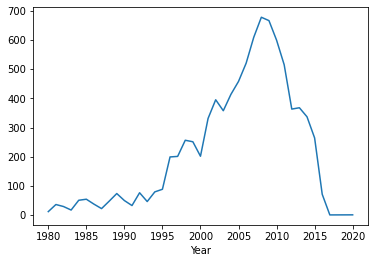

In [17]:
yers=df.groupby('Year')['Global_Sales'].sum() # graph showing year with the highest global sales
yers.plot()

`data seems to be incomplete for recent years`

In [18]:
publisher_sales= df.groupby(['Publisher'],as_index=False).sum() ## dataframe of individual publisher sales over the years
publisher_sales

,Publisher,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10TACLE Studios,42192,6020,0.07,0.04,0.00,0.00,0.11
1,1C Company,43237,6031,0.01,0.07,0.00,0.02,0.10
2,20th Century Fox Video Games,27266,9907,1.82,0.10,0.00,0.01,1.94
3,2D Boy,14013,2008,0.00,0.03,0.00,0.01,0.04
4,3DO,289344,72018,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...,...,...,...
571,id Software,14602,1992,0.02,0.00,0.00,0.00,0.03
572,imageepoch Inc.,30688,4028,0.00,0.00,0.04,0.00,0.04
573,inXile Entertainment,10758,2015,0.02,0.06,0.00,0.01,0.10
574,"mixi, Inc",2411,2015,0.00,0.00,0.86,0.00,0.86


In [19]:
publisher_sales['Global_Sales'].describe(include='all') # overview of publisher sales dataframe

count     576.000000
mean       15.298559
std       102.865446
min         0.010000
25%         0.070000
50%         0.320000
75%         1.632500
max      1784.430000
Name: Global_Sales, dtype: float64

In [20]:
## learning binning
# bins = np.linspace(min(publisher_sales["Global_Sales"]), max(publisher_sales["Global_Sales"]), 5)
# bins = np.linspace(0.0,100, 4)
bins = np.array([min(publisher_sales["Global_Sales"]),publisher_sales['Global_Sales'].mean(),102.865446,max(publisher_sales["Global_Sales"])])
bins

array([1.00000000e-02, 1.52985590e+01, 1.02865446e+02, 1.78443000e+03])

In [21]:
group_names = ['average','better-sellers','best-sellers']

In [22]:
publisher_sales["Global_Sales_Binned"] = pd.cut(publisher_sales["Global_Sales"], bins, labels=group_names, include_lowest=True )
publisher_sales[['Global_Sales','Global_Sales_Binned']].head(20)

,Global_Sales,Global_Sales_Binned
0,0.11,average
1,0.10,average
2,1.94,average
3,0.04,average
4,10.12,average
5,0.04,average
6,55.91,better-sellers
7,1.63,average
8,0.08,average
9,0.38,average


In [23]:
publisher_sales["Global_Sales_Binned"].value_counts() # view overall performance of the industry

average           537
better-sellers     23
best-sellers       16
Name: Global_Sales_Binned, dtype: int64

In [24]:
publisher_sales.loc[publisher_sales["Global_Sales_Binned"]=='best-sellers'] # who are the best selling publishers?

,Publisher,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Binned
21,Activision,6324706,1938979,426.01,213.72,6.54,74.79,721.41,best-sellers
53,Atari,2807745,694799,101.23,25.80,10.70,8.73,146.77,best-sellers
85,Capcom,2927554,754293,78.45,39.16,67.38,14.82,199.95,best-sellers
126,Disney Interactive Studios,1231691,429903,70.44,34.36,0.56,13.15,118.76,best-sellers
138,Electronic Arts,7102442,2686562,584.22,367.38,13.98,127.63,1093.39,best-sellers
275,Konami Digital Entertainment,7270213,1650392,88.91,68.62,90.93,29.91,278.56,best-sellers
323,Microsoft Game Studios,1158582,379275,155.35,68.61,3.26,18.56,245.79,best-sellers
347,Namco Bandai Games,8696058,1863670,69.38,42.61,126.84,14.64,253.65,best-sellers
359,Nintendo,2646098,1394666,815.75,418.30,454.99,95.19,1784.43,best-sellers
445,Sega,5011632,1267395,108.78,81.41,56.19,24.30,270.70,best-sellers


In [25]:
publisher_sales.loc[publisher_sales["Global_Sales_Binned"]=='better-sellers'] # who's doing above average in sales

,Publisher,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Binned
6,505 Games,1867245,385693,31.83,16.43,2.05,5.44,55.91,better-sellers
17,Acclaim Entertainment,1454037,367958,42.75,16.75,1.14,3.37,64.14,better-sellers
63,Banpresto,655522,146149,0.41,0.20,16.44,0.36,17.40,better-sellers
66,Bethesda Softworks,355783,138760,39.43,30.48,1.44,10.10,81.53,better-sellers
91,Codemasters,1322810,301147,11.88,28.65,0.83,6.29,47.77,better-sellers
109,D3Publisher,2120688,367726,11.48,4.99,4.65,2.87,24.06,better-sellers
120,Deep Silver,1246366,243330,12.73,8.89,1.09,2.87,25.59,better-sellers
137,Eidos Interactive,1601884,392840,47.85,34.85,6.11,7.90,96.75,better-sellers
144,Enix Corporation,140370,59928,0.76,0.31,32.40,0.27,33.74,better-sellers
177,GT Interactive,311174,89881,15.57,8.49,0.02,1.14,25.23,better-sellers


In [26]:
best=publisher_sales.loc[publisher_sales["Global_Sales_Binned"]=='best-sellers']
best['Publisher'] # best sellers

21                                 Activision
53                                      Atari
85                                     Capcom
126                Disney Interactive Studios
138                           Electronic Arts
275              Konami Digital Entertainment
323                    Microsoft Game Studios
347                        Namco Bandai Games
359                                  Nintendo
445                                      Sega
455               Sony Computer Entertainment
464                               Square Enix
487                                       THQ
493                      Take-Two Interactive
524                                   Ubisoft
547    Warner Bros. Interactive Entertainment
Name: Publisher, dtype: object

Text(0.5, 1.0, 'Global')

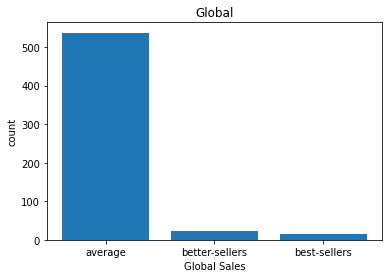

In [27]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, publisher_sales["Global_Sales_Binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Global Sales")
plt.pyplot.ylabel("count")
plt.pyplot.title("Global")

Text(0.5, 1.0, 'best selling publishers by Global video game sales (1980-2020)')

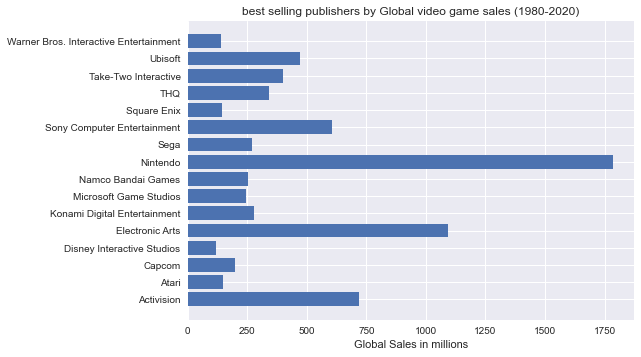

In [28]:
plt.style.use("seaborn")
pyplot.barh(best['Publisher'], best['Global_Sales'])

# # set x/y labels and plot title
plt.pyplot.xlabel("Global Sales in millions")
# create plot of best selling publishers
plt.pyplot.title("best selling publishers by Global video game sales (1980-2020)")

### finding the best-sellers for each year since 1980

In [29]:

##? publishers group containing global sales for each year and each game
pubgrp= df[["Publisher","Year","Global_Sales"]]
pubgrp

,Publisher,Year,Global_Sales
0,Nintendo,2006,82.74
1,Nintendo,1985,40.24
2,Nintendo,2008,35.82
3,Nintendo,2009,33.00
4,Nintendo,1996,31.37
...,...,...,...
16593,Kemco,2002,0.01
16594,Infogrames,2003,0.01
16595,Activision,2008,0.01
16596,7G//AMES,2010,0.01


In [30]:
mydf = pubgrp.groupby(['Year','Publisher']).agg({'Global_Sales':np.sum})
mydf= mydf.groupby('Year')['Global_Sales'].nlargest(1).reset_index(level=1,drop=True)

In [31]:
mydf

Year  Publisher                  
1980  Atari                            8.36
1981  Activision                       8.50
1982  Atari                           19.43
1983  Nintendo                        10.96
1984  Nintendo                        45.56
1985  Nintendo                        49.95
1986  Nintendo                        16.18
1987  Nintendo                        11.95
1988  Nintendo                        36.44
1989  Nintendo                        63.88
1990  Nintendo                        35.49
1991  Nintendo                        15.97
1992  Nintendo                        38.11
1993  Nintendo                        20.04
1994  Nintendo                        24.99
1995  Sony Computer Entertainment     18.45
1996  Nintendo                        73.70
1997  Sony Computer Entertainment     43.90
1998  Nintendo                        48.41
1999  Nintendo                        65.33
2000  Nintendo                        34.05
2001  Nintendo                        45.3

In [32]:
years = np.array([year[0] for year in mydf.index])
years

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

In [33]:
sales=mydf.loc[years].values
sales

array([8.3600e+00, 8.5000e+00, 1.9430e+01, 1.0960e+01, 4.5560e+01,
       4.9950e+01, 1.6180e+01, 1.1950e+01, 3.6440e+01, 6.3880e+01,
       3.5490e+01, 1.5970e+01, 3.8110e+01, 2.0040e+01, 2.4990e+01,
       1.8450e+01, 7.3700e+01, 4.3900e+01, 4.8410e+01, 6.5330e+01,
       3.4050e+01, 4.5370e+01, 7.3010e+01, 6.9830e+01, 6.7330e+01,
       1.2747e+02, 2.0561e+02, 1.0418e+02, 9.1220e+01, 1.2889e+02,
       8.1380e+01, 7.2250e+01, 5.6470e+01, 5.2920e+01, 4.8650e+01,
       4.5420e+01, 1.2250e+01, 4.0000e-02, 2.9000e-01])

In [34]:
pubs = np.array([year[1] for year in mydf.index])
# pubs = np.unique(pubs)
pubs

array(['Atari', 'Activision', 'Atari', 'Nintendo', 'Nintendo', 'Nintendo',
       'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
       'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
       'Sony Computer Entertainment', 'Nintendo',
       'Sony Computer Entertainment', 'Nintendo', 'Nintendo', 'Nintendo',
       'Nintendo', 'Electronic Arts', 'Electronic Arts',
       'Electronic Arts', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
       'Nintendo', 'Electronic Arts', 'Electronic Arts', 'Nintendo',
       'Electronic Arts', 'Nintendo', 'Electronic Arts',
       'Electronic Arts', 'Sega', 'Ubisoft'], dtype='<U27')

In [35]:
mydf.loc[years[0]].index

Index(['Atari'], dtype='object', name='Publisher')

Text(0.5, 1.0, 'best selling years by Global video game sales (1980-2020)')

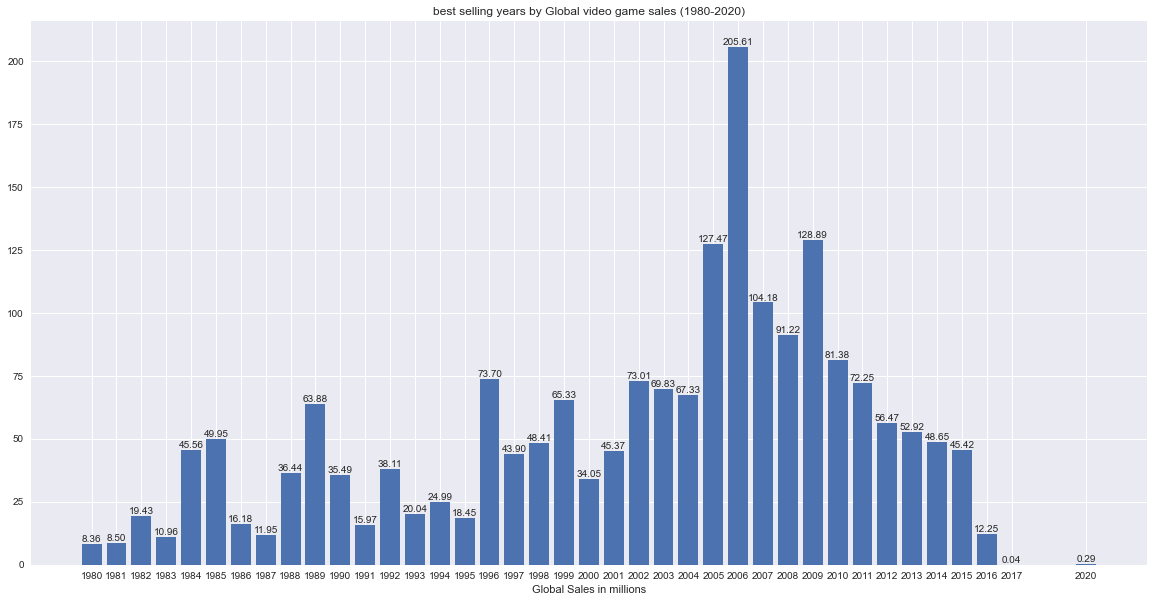

In [36]:



fig, ax = pyplot.subplots(figsize=(20,10))
plt.style.use("seaborn")
bars = pyplot.bar(years, mydf.loc[years].values)
ax.bar_label(bars, fmt='%.2f')

ax.set_xticks(years)

plt.pyplot.xlabel("Global Sales in millions")
plt.pyplot.title("best selling years by Global video game sales (1980-2020)")

<AxesSubplot:title={'center':'Top publisher from 1980-2020'}, ylabel='Year,Publisher'>

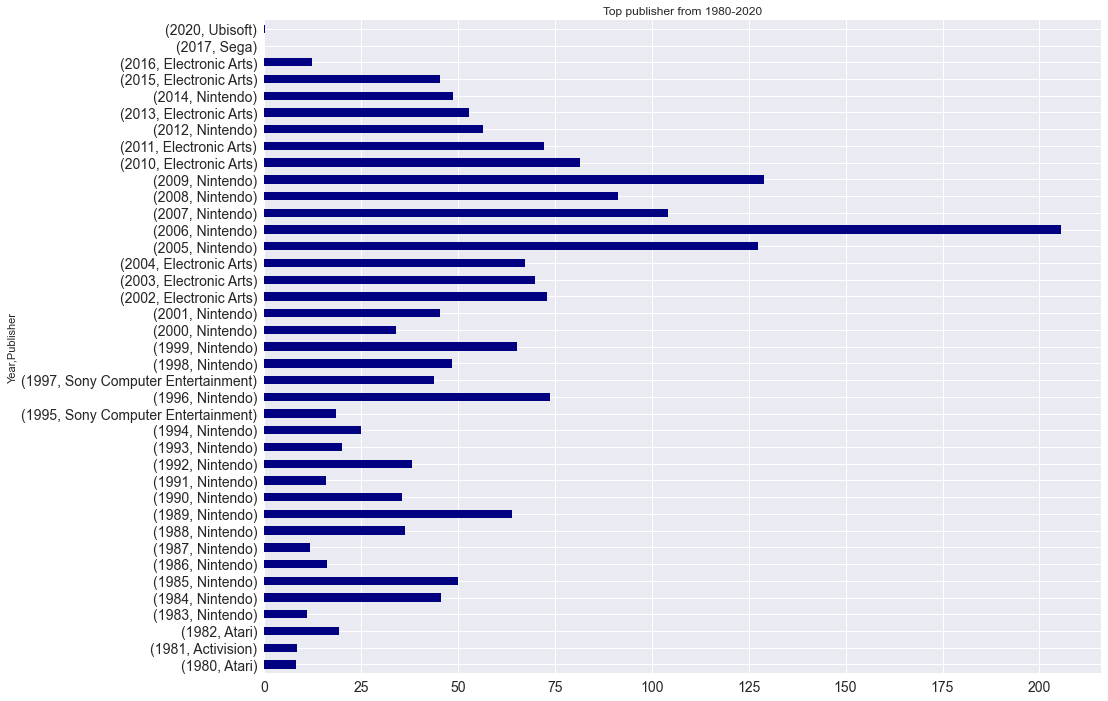

In [37]:
mydf.plot(kind='barh',figsize=(15,12),use_index=True,title='Top publisher from 1980-2020',fontsize=14,colormap='jet')